# Number Recognition w/ CNN

A simple convolutional neural network to predict numbers trained on the MNIST database. Created using Tensorflow / Keras. Created for BSYS 4005.

## Imports

In [14]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras import layers

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
from matplotlib import pyplot

## Load & Prepare Data 

In [4]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# One hot encode target values
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

# Reshape data to single channel
raw_train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
raw_test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

# Normalize data
train_x = raw_train_x.astype("float32") / 255.0
test_x = raw_test_x.astype("float32") / 255.0

## Define Model

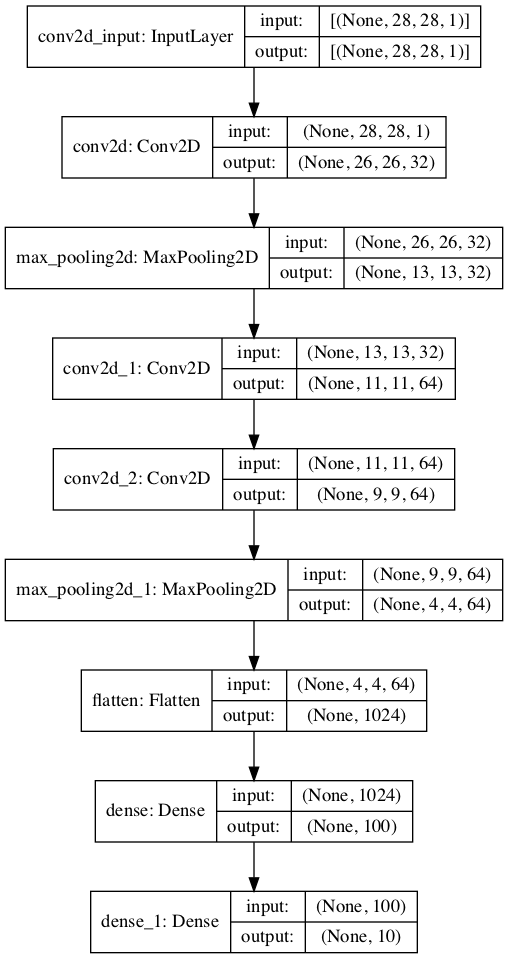

In [5]:
# Define model structure
cnn_model = Sequential(
    [
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                      input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform"),
        layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform"),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(100, activation="relu", kernel_initializer="he_uniform"),
        layers.Dense(10, activation="softmax"),
    ]
)

# Compile model
opt = SGD(learning_rate = 0.01, momentum = 0.9)
cnn_model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])

# Plot Model
img_file = 'cnn_model.png'
plot_model(cnn_model, to_file=img_file, show_shapes=True)

## Train / Evaluate Model

In [53]:
scores, histories = list(), list()

cnn_model.fit(train_x, train_y, epochs=5, batch_size=16, validation_data=(test_x, test_y), verbose=1)

_, eval_results = cnn_model.evaluate(test_x, test_y, verbose=0)

print(f"Model Accuracy on Test Data: {eval_results * 100.0}")

# Save model to be used later
cnn_model.save("keras_model")

Epoch 1/5
3750/3750 [==============================] - 20s 5ms/step - loss: 0.1146 - accuracy: 0.9640 - val_loss: 0.0413 - val_accuracy: 0.9855
Epoch 2/5
3750/3750 [==============================] - 20s 5ms/step - loss: 0.0398 - accuracy: 0.9869 - val_loss: 0.0460 - val_accuracy: 0.9852
Epoch 3/5
3750/3750 [==============================] - 20s 5ms/step - loss: 0.0252 - accuracy: 0.9924 - val_loss: 0.0298 - val_accuracy: 0.9905
Epoch 4/5
3750/3750 [==============================] - 20s 5ms/step - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.0301 - val_accuracy: 0.9900
Epoch 5/5
3750/3750 [==============================] - 21s 6ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0297 - val_accuracy: 0.9913
Model Accuracy on Test Data: 99.12999868392944
INFO:tensorflow:Assets written to: keras_model/assets


## Helper Functions
Helper function to load / prepare custom images. Images should be 28x28.

In [6]:
def load_custom_file(image_path):
    # Load image
    custom_img = load_img(image_path, color_mode="grayscale", target_size=(28, 28))

    # Convert image data to array
    custom_img = img_to_array(custom_img)

    # Reshape into a single sample with 1 channel and invert to match training set
    custom_img = 255.0 - custom_img.reshape(1, 28, 28, 1)

    # Prepare and normalize pixel data
    custom_img = custom_img.astype('float32') / 255.0

    return custom_img

Helper function to make it easy to call the model.

In [7]:
def predict_image(img_path, saved_model):
    img = load_custom_file(img_path)
    predictions = saved_model.predict(img)
    print(f"Model Predicts: {np.argmax(predictions)}\n{np.amax(predictions)*100:0.2f}% confidence")

Helper function to plot custom image files.

In [8]:
def plot_image(img_path):
    # Load image data from png files into an array
    img_array = img_to_array(load_img(
        img_path, color_mode="grayscale", target_size=(28, 28)))

    img_data = 255 - (img_array / 255.0 * 0.99) + 0.01

    pyplot.imshow(img_data, cmap="Greys", interpolation="None")
    pyplot.show()

## Predict Images

Model Predicts: 3
100.00% confidence


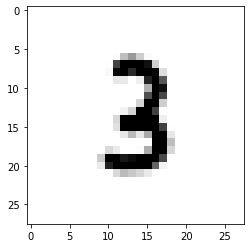

Model Predicts: 7
96.63% confidence


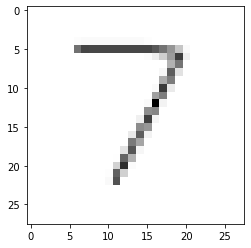

Model Predicts: 9
100.00% confidence


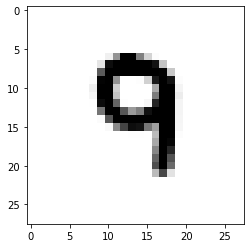

In [15]:
saved_model = load_model("keras_model")

test_imgs = ["Images/3-test-img.png", "Images/7-test-img.png", "Images/9-test-img.png"]

for img in test_imgs:
    predict_image(img, saved_model)
    plot_image(img)
    